In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso

In [ ]:
df = pd.read_csv("SolarPrediction.csv")

In [ ]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [ ]:
df = df.rename(columns= {"WindDirection(Degrees)":"WindDirection"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNIXTime       32686 non-null  int64  
 1   Data           32686 non-null  object 
 2   Time           32686 non-null  object 
 3   Radiation      32686 non-null  float64
 4   Temperature    32686 non-null  int64  
 5   Pressure       32686 non-null  float64
 6   Humidity       32686 non-null  int64  
 7   WindDirection  32686 non-null  float64
 8   Speed          32686 non-null  float64
 9   TimeSunRise    32686 non-null  object 
 10  TimeSunSet     32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [ ]:
df.isna().sum()

UNIXTime         0
Data             0
Time             0
Radiation        0
Temperature      0
Pressure         0
Humidity         0
WindDirection    0
Speed            0
TimeSunRise      0
TimeSunSet       0
dtype: int64

Text(0.5, 1.0, 'Missing values in the dataset')

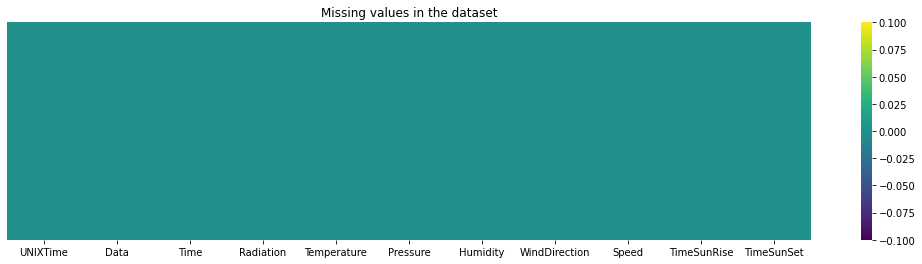

In [ ]:
plt.figure(figsize=(18,4))
sns.heatmap(df.isnull(),cmap = "viridis",yticklabels= False)
plt.title("Missing values in the dataset")

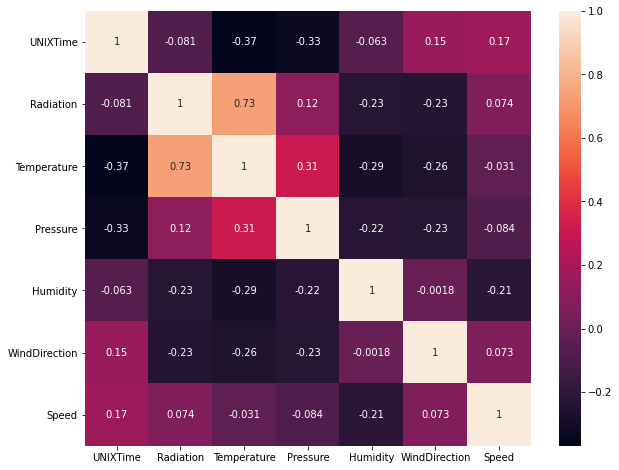

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,annot= True)

In [ ]:
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection', 'Speed', 'TimeSunRise', 'TimeSunSet'],
      dtype='object')

In [ ]:
x = df[["Temperature","Pressure","Humidity","WindDirection","Speed"]].values
y = df.Radiation.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 50)

In [ ]:
# Gradient boosting model
rf_model = GradientBoostingRegressor()
rf_model.fit(x_train,y_train)
pred_val = rf_model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,roc_auc_score,mean_absolute_error
print("METRICS FOR RANDOM FOREST MODEL","\n")
print("The R2 score is :",r2_score(y_test,pred_val) )
print("The Mean absolute error is :",mean_absolute_error(y_test,pred_val))

METRICS FOR RANDOM FOREST MODEL 

The R2 score is : 0.7035022249186831
The Mean absolute error is : 107.36734267566908


In [ ]:
# XGBoost model
from xgboost import XGBRegressor
xg_model = XGBRegressor()
xg_model.fit(x_train,y_train)
y_prediction = xg_model.predict(x_test)

[14:59:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import r2_score,roc_auc_score,mean_absolute_error
print("METRICS FOR XGBOOST MODEL","\n")
print("The R2 score is :",r2_score(y_test,y_prediction) )
print("The Mean absolute error is :",mean_absolute_error(y_test,y_prediction))

METRICS FOR XGBOOST MODEL 

The R2 score is : 0.7038819656912276
The Mean absolute error is : 107.22385469596897


In [ ]:
#Lasso Regression
lass_model = Lasso()
lass_model.fit(x_train,y_train)
Y_Prediction = lass_model.predict(x_test)

In [ ]:
print("METRICS FOR XGBOOST MODEL","\n")
print("The R2 score is :",r2_score(y_test,Y_Prediction) )
print("The Mean absolute error is :",mean_absolute_error(y_test,Y_Prediction))

METRICS FOR XGBOOST MODEL 

The R2 score is : 0.5652070715459372
The Mean absolute error is : 158.68174906086765


In [ ]:
import pickle

file1 = "solar_pred.pkl"
file_obj = open(file1,"wb")
pickle.dump(rf_model,file_obj)
file_obj.close()